In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
from soMaps import SOM
import matplotlib

## 4.1

In [2]:
data = np.genfromtxt('data_lab2/animals.dat',
                     dtype=None,
                     delimiter=',')
data = data.reshape(32,84) # species x attributes
names = np.loadtxt("data_lab2/animalnames.txt", dtype=str)

In [3]:
som = SOM(num_features=84, data=data, num_nodes=100, seed = 21)
som.train(40,0.2,data,100,1,False)

In [4]:
results = {n:0 for n in names}
for idx, n in enumerate(names):
    index = som.get_closest_node(idx)
    results[n] = index
results = dict(sorted(results.items(), key=lambda item: item[1]))

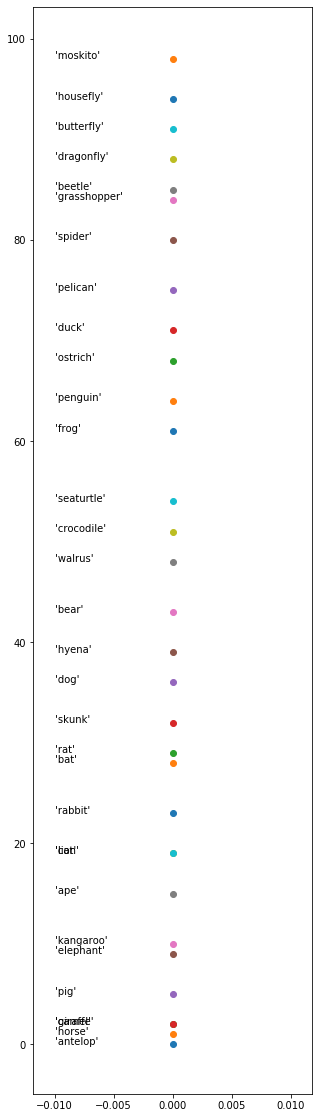

In [5]:
plt.figure(figsize=(5,20))
for key in results.keys():
    v = results[key]
    plt.scatter(0,v)
    plt.text(-0.01,v,key)

In [6]:
results

{"'antelop'": 0,
 "'horse'": 1,
 "'camel'": 2,
 "'giraffe'": 2,
 "'pig'": 5,
 "'elephant'": 9,
 "'kangaroo'": 10,
 "'ape'": 15,
 "'cat'": 19,
 "'lion'": 19,
 "'rabbit'": 23,
 "'bat'": 28,
 "'rat'": 29,
 "'skunk'": 32,
 "'dog'": 36,
 "'hyena'": 39,
 "'bear'": 43,
 "'walrus'": 48,
 "'crocodile'": 51,
 "'seaturtle'": 54,
 "'frog'": 61,
 "'penguin'": 64,
 "'ostrich'": 68,
 "'duck'": 71,
 "'pelican'": 75,
 "'spider'": 80,
 "'grasshopper'": 84,
 "'beetle'": 85,
 "'dragonfly'": 88,
 "'butterfly'": 91,
 "'housefly'": 94,
 "'moskito'": 98}

## 4.2

In [7]:
#load data
cities = np.genfromtxt('data_lab2/cities.dat',
                     dtype=float,
                     delimiter=',',
                     skip_header=3)
cities = cities[:,:2]

In [8]:
# init and train model
som2 = SOM(num_features=2, data=cities, num_nodes=10, seed=6) #6 for optimal solution
som2.train(100,0.3,cities,2,0,True)

In [9]:
#sort results
results = {i:0 for i in range(10)}
for idx in range(10):
    index = som2.get_closest_node(idx)
    results[idx] = index
results = dict(sorted(results.items(), key=lambda item: item[1]))
path = np.array([key for key in results.keys()])

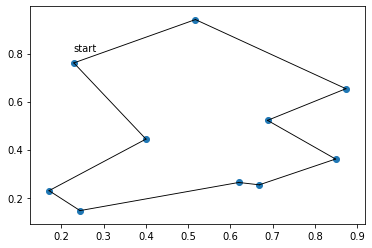

In [10]:
#plot results
plt.scatter(cities[:,0],cities[:,1])
# label starting point
start = path[0]
pos = cities[start]
plt.text(pos[0],pos[1]+0.05,'start')
#plot path
for i,c in enumerate(path):
    x1 = cities[c]
    x2 = cities[path[(i+1)%len(path)]]
    plt.plot([x1[0],x2[0]],[x1[1],x2[1]],color='black',linewidth=0.9)

## 4.3

In [11]:
import random
import matplotlib.colors as mcolors

In [12]:
votes = np.genfromtxt('data_lab2/votes.dat',dtype=float,delimiter=',')
votes = votes.reshape(349,31)
party = np.genfromtxt('data_lab2/mpparty.dat',dtype=int,delimiter=',',skip_header=3)
gender = np.genfromtxt('data_lab2/mpsex.dat',dtype=int,delimiter=',',skip_header=1)
district = np.genfromtxt('data_lab2/mpdistrict.dat',dtype=int,delimiter=',',skip_header=1)
# colors = np.array([key for key in mcolors.CSS4_COLORS.keys()])
# random.shuffle(colors)

In [13]:
som3 = SOM(num_features=31, data=votes, num_nodes=100, seed=22, grid=(10,10))
som3.train(30,0.3,votes,80,1,False) #here the num_neighbours are distances

#### labeld by party

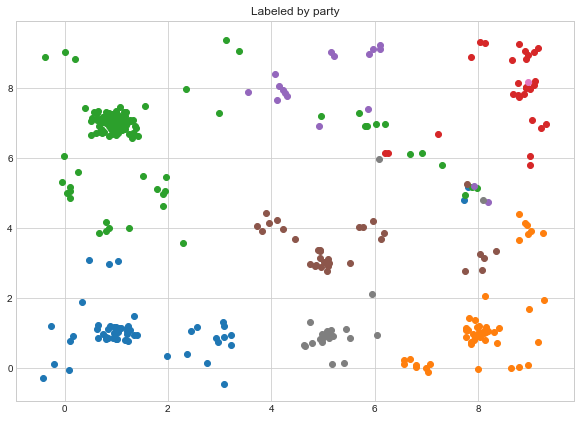

In [14]:
matplotlib.style.use('seaborn-whitegrid') #sets the size of the charts
#matplotlib.style.use('ggplot')
plt.figure(figsize=(10,7))
results = {p:([],[]) for p in party}
for i,p in enumerate(party):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    results[p][0].append(pos[0])
    results[p][1].append(pos[1])
    pos = som3.mapping[w_id]
    # c = colors[p]
    # plt.scatter(pos[0],pos[1],color = c)
for key in results.keys():
    x1 = [i+np.random.normal(0,0.2) for i in results[key][0]]
    x2 = [i+np.random.normal(0,0.2) for i in results[key][1]]
    plt.scatter(x1,x2)
#plt.legend(['m','fp','s','v','mp','kd','no party','c'])
plt.title('Labeled by party')
plt.show()

#### labeld by gender

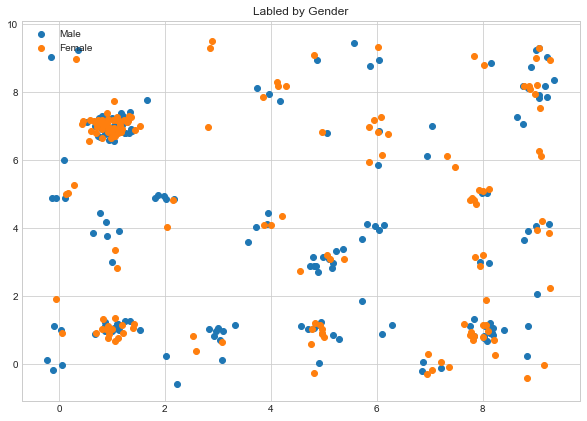

In [15]:
matplotlib.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
results = {p:([],[]) for p in gender}
for i,p in enumerate(gender):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    results[p][0].append(pos[0])
    results[p][1].append(pos[1])
    pos = som3.mapping[w_id]
    # c = colors[p]
    # plt.scatter(pos[0],pos[1],color = c)
for key in results.keys():
    x1 = [i+np.random.normal(0,0.2) for i in results[key][0]]
    x2 = [i+np.random.normal(0,0.2) for i in results[key][1]]
    plt.scatter(x1,x2)
plt.legend(['Male', 'Female'])
plt.title('Labled by Gender')
plt.show()

#### labeld by district

Text(0.5, 1.0, 'Labeled by district')

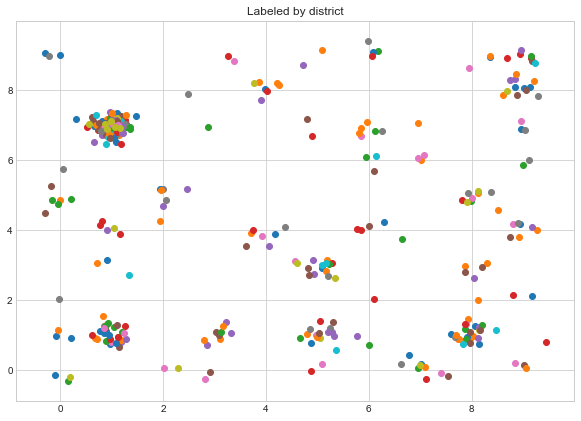

In [16]:
matplotlib.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,7))
results = {p:([],[]) for p in district}
for i,p in enumerate(district):
    w_id = som3.get_closest_node(i)
    pos = som3.mapping[w_id]
    results[p][0].append(pos[0])
    results[p][1].append(pos[1])
    pos = som3.mapping[w_id]
    # c = colors[p]
    # plt.scatter(pos[0],pos[1],color = c)
for key in results.keys():
    x1 = [i+np.random.normal(0,0.2) for i in results[key][0]]
    x2 = [i+np.random.normal(0,0.2) for i in results[key][1]]
    plt.scatter(x1,x2)
plt.title('Labeled by district')